## Getting Satarted

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from pycaret.classification import setup, compare_models
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import KFold, cross_val_score

pd.set_option("display.max_column", None)

In [16]:
train0 = pd.read_csv("Data/train.csv")
test0 = pd.read_csv("Data/test.csv")

In [17]:
train0

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


In [18]:
test0

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,34593,Male,23.327836,1.721384,78.030383,yes,no,2.813234,3.000000,Sometimes,no,1.000000,no,0.807076,0.778632,Sometimes,Public_Transportation
13836,34594,Female,29.000000,1.590000,62.000000,no,yes,3.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
13837,34595,Female,22.935612,1.585547,44.376637,no,yes,3.000000,2.273740,Frequently,no,2.000000,no,1.949840,1.000000,Sometimes,Public_Transportation
13838,34596,Male,21.000000,1.620000,53.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,3.000000,2.000000,no,Public_Transportation


## EDA

In [19]:
train0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [20]:
train0.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [21]:
train0.isna().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [22]:
train0["NObeyesdad"].unique()

array(['Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight',
       'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I',
       'Obesity_Type_I'], dtype=object)

### Combine Train and Test

In [23]:
target = train0["NObeyesdad"]
test_ids = test0["id"]

train1 = train0.drop(["id", "NObeyesdad"], axis = 1)
test1 = test0.drop(["id"], axis = 1)

data1 = pd.concat([train1, test1], axis = 0)
data1

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,Male,23.327836,1.721384,78.030383,yes,no,2.813234,3.000000,Sometimes,no,1.000000,no,0.807076,0.778632,Sometimes,Public_Transportation
13836,Female,29.000000,1.590000,62.000000,no,yes,3.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
13837,Female,22.935612,1.585547,44.376637,no,yes,3.000000,2.273740,Frequently,no,2.000000,no,1.949840,1.000000,Sometimes,Public_Transportation
13838,Male,21.000000,1.620000,53.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,3.000000,2.000000,no,Public_Transportation


### Analysis

In [24]:
data2 = data1.copy()

In [25]:
data2.isna().sum().sum()

0

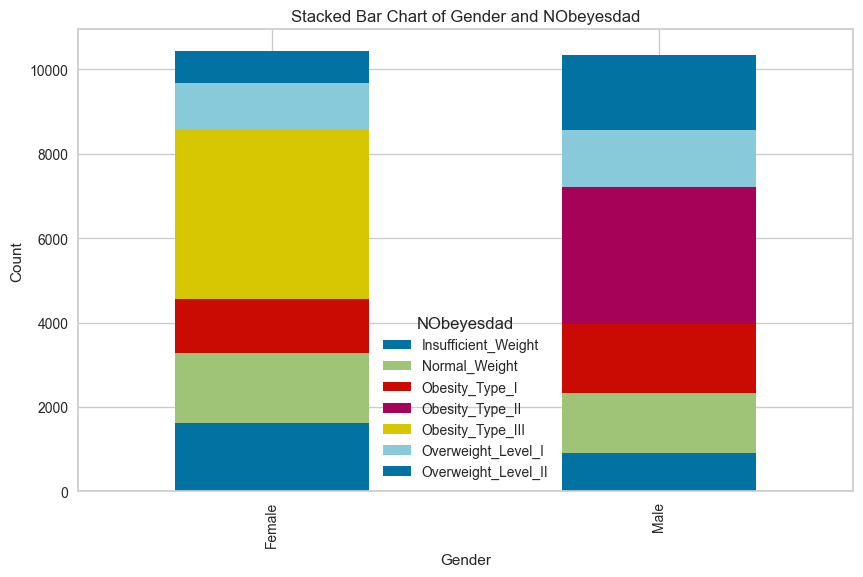

In [26]:
crosstab = pd.crosstab(train0["Gender"], target)

crosstab.plot(kind='bar', stacked=True, figsize= (10, 6))
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of Gender and NObeyesdad')
plt.show()


In [27]:
corr_matrix = train0.select_dtypes(np.number).corr()

fig = px.imshow(corr_matrix, title= "Correlation Matrix", )
fig.show()

### Encode Categorical Features

In [28]:
data3 = data2.copy()

In [29]:
data3 = pd.get_dummies(data3, dtype= "int")
data3

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_no,SMOKE_yes,SCC_no,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0
1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0
2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0
3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0
4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,23.327836,1.721384,78.030383,2.813234,3.000000,1.000000,0.807076,0.778632,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0
13836,29.000000,1.590000,62.000000,3.000000,3.000000,2.000000,0.000000,0.000000,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0
13837,22.935612,1.585547,44.376637,3.000000,2.273740,2.000000,1.949840,1.000000,1,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0
13838,21.000000,1.620000,53.000000,2.000000,3.000000,2.000000,3.000000,2.000000,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0


### Scaling

In [30]:
data4 = data3.copy()

In [31]:
scaler = StandardScaler()
scaler.fit(data4)
data4 = pd.DataFrame(scaler.fit_transform(data4), data4.index, columns = data4.columns)
data4

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_no,SMOKE_yes,SCC_no,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0.097125,0.003156,-0.228998,-0.835030,0.319748,1.202683,-1.166547,0.598886,-1.005100,1.005100,-0.467253,0.467253,-0.309980,0.309980,-0.157455,-0.366096,0.429107,-0.115311,0.11152,-0.11152,0.185506,-0.185506,-0.007603,-0.16108,0.617603,-0.57853,-0.455225,-0.040623,-0.040623,0.494593,-0.148551
1,-1.026697,-1.589647,-1.167979,-0.835030,0.343353,-0.049985,0.025192,0.637808,0.994926,-0.994926,-0.467253,0.467253,-0.309980,0.309980,-0.157455,2.731527,-2.330419,-0.115311,0.11152,-0.11152,0.185506,-0.185506,-0.007603,-0.16108,-1.619163,1.72852,2.196716,-0.040623,-0.040623,-2.021866,-0.148551
2,-1.026697,0.133563,-1.428102,-1.059354,-1.901298,-0.197013,-0.134447,1.752153,0.994926,-0.994926,-0.467253,0.467253,-0.309980,0.309980,-0.157455,-0.366096,0.429107,-0.115311,0.11152,-0.11152,0.185506,-0.185506,-0.007603,-0.16108,-1.619163,1.72852,-0.455225,-0.040623,-0.040623,0.494593,-0.148551
3,-0.511666,0.125258,1.659050,1.042690,0.343353,-0.584699,0.582763,0.274179,0.994926,-0.994926,-0.467253,0.467253,-0.309980,0.309980,-0.157455,-0.366096,0.429107,-0.115311,0.11152,-0.11152,0.185506,-0.185506,-0.007603,-0.16108,0.617603,-0.57853,-0.455225,-0.040623,-0.040623,0.494593,-0.148551
4,1.352648,2.440044,0.232618,0.441189,-1.110191,-0.083045,1.178764,0.524850,-1.005100,1.005100,-0.467253,0.467253,-0.309980,0.309980,-0.157455,-0.366096,0.429107,-0.115311,0.11152,-0.11152,0.185506,-0.185506,-0.007603,-0.16108,0.617603,-0.57853,-0.455225,-0.040623,-0.040623,0.494593,-0.148551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,-0.097389,0.246472,-0.367527,0.691996,0.343353,-1.690520,-0.204723,0.271587,-1.005100,1.005100,-0.467253,0.467253,3.226017,-3.226017,-0.157455,-0.366096,0.429107,-0.115311,0.11152,-0.11152,0.185506,-0.185506,-0.007603,-0.16108,0.617603,-0.57853,-0.455225,-0.040623,-0.040623,0.494593,-0.148551
13836,0.891978,-1.248327,-0.977671,1.042690,0.343353,-0.049985,-1.166547,-1.016544,0.994926,-0.994926,2.140169,-2.140169,-0.309980,0.309980,-0.157455,-0.366096,0.429107,-0.115311,0.11152,-0.11152,0.185506,-0.185506,-0.007603,-0.16108,0.617603,-0.57853,-0.455225,-0.040623,-0.040623,0.494593,-0.148551
13837,-0.165803,-1.298990,-1.648446,1.042690,-0.683018,-0.049985,1.157154,0.637808,0.994926,-0.994926,2.140169,-2.140169,-0.309980,0.309980,-0.157455,2.731527,-2.330419,-0.115311,0.11152,-0.11152,0.185506,-0.185506,-0.007603,-0.16108,0.617603,-0.57853,-0.455225,-0.040623,-0.040623,0.494593,-0.148551
13838,-0.503422,-0.907007,-1.320226,-0.835030,0.343353,-0.049985,2.408672,2.292160,-1.005100,1.005100,-0.467253,0.467253,-0.309980,0.309980,-0.157455,-0.366096,0.429107,-0.115311,0.11152,-0.11152,0.185506,-0.185506,-0.007603,-0.16108,-1.619163,1.72852,-0.455225,-0.040623,-0.040623,0.494593,-0.148551


### Spliting Data

In [32]:
data5 = data4.copy()

In [33]:
train0

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


In [34]:
test0

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,34593,Male,23.327836,1.721384,78.030383,yes,no,2.813234,3.000000,Sometimes,no,1.000000,no,0.807076,0.778632,Sometimes,Public_Transportation
13836,34594,Female,29.000000,1.590000,62.000000,no,yes,3.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
13837,34595,Female,22.935612,1.585547,44.376637,no,yes,3.000000,2.273740,Frequently,no,2.000000,no,1.949840,1.000000,Sometimes,Public_Transportation
13838,34596,Male,21.000000,1.620000,53.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,3.000000,2.000000,no,Public_Transportation


In [35]:
train_final = data5.iloc[:len(train0), :]
test_final = data5.iloc[len(train0):, :]
test_final

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_no,SMOKE_yes,SCC_no,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0.525665,1.690369,1.254428,0.927428,0.343353,1.304488,-0.147133,-1.016544,-1.005100,1.005100,-0.467253,0.467253,-0.309980,0.309980,-0.157455,-0.366096,0.429107,-0.115311,0.11152,-0.11152,0.185506,-0.185506,-0.007603,-0.16108,0.617603,-0.57853,-0.455225,-0.040623,-0.040623,0.494593,-0.148551
1,-0.503422,-1.134554,-0.825424,-0.835030,-2.483103,1.590550,0.025192,-1.016544,0.994926,-0.994926,-0.467253,0.467253,-0.309980,0.309980,-0.157455,-0.366096,0.429107,-0.115311,0.11152,-0.11152,0.185506,-0.185506,-0.007603,-0.16108,0.617603,-0.57853,-0.455225,-0.040623,-0.040623,0.494593,-0.148551
2,0.368703,-0.641290,0.910212,1.042690,0.343353,0.970226,-1.166547,-0.602126,0.994926,-0.994926,-0.467253,0.467253,-0.309980,0.309980,-0.157455,-0.366096,0.429107,-0.115311,0.11152,-0.11152,0.185506,-0.185506,-0.007603,-0.16108,0.617603,-0.57853,-0.455225,-0.040623,-0.040623,0.494593,-0.148551
3,-0.507041,-1.667844,0.608328,-0.835030,0.312134,1.240160,-1.053509,-1.016544,-1.005100,1.005100,-0.467253,0.467253,-0.309980,0.309980,-0.157455,-0.366096,0.429107,-0.115311,0.11152,-0.11152,0.185506,-0.185506,-0.007603,-0.16108,0.617603,-0.57853,-0.455225,-0.040623,-0.040623,0.494593,-0.148551
4,0.368703,-0.822861,0.652717,1.042690,0.343353,1.022156,-1.166547,0.209445,0.994926,-0.994926,-0.467253,0.467253,-0.309980,0.309980,-0.157455,-0.366096,0.429107,-0.115311,0.11152,-0.11152,0.185506,-0.185506,-0.007603,-0.16108,0.617603,-0.57853,-0.455225,-0.040623,-0.040623,0.494593,-0.148551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,-0.097389,0.246472,-0.367527,0.691996,0.343353,-1.690520,-0.204723,0.271587,-1.005100,1.005100,-0.467253,0.467253,3.226017,-3.226017,-0.157455,-0.366096,0.429107,-0.115311,0.11152,-0.11152,0.185506,-0.185506,-0.007603,-0.16108,0.617603,-0.57853,-0.455225,-0.040623,-0.040623,0.494593,-0.148551
13836,0.891978,-1.248327,-0.977671,1.042690,0.343353,-0.049985,-1.166547,-1.016544,0.994926,-0.994926,2.140169,-2.140169,-0.309980,0.309980,-0.157455,-0.366096,0.429107,-0.115311,0.11152,-0.11152,0.185506,-0.185506,-0.007603,-0.16108,0.617603,-0.57853,-0.455225,-0.040623,-0.040623,0.494593,-0.148551
13837,-0.165803,-1.298990,-1.648446,1.042690,-0.683018,-0.049985,1.157154,0.637808,0.994926,-0.994926,2.140169,-2.140169,-0.309980,0.309980,-0.157455,2.731527,-2.330419,-0.115311,0.11152,-0.11152,0.185506,-0.185506,-0.007603,-0.16108,0.617603,-0.57853,-0.455225,-0.040623,-0.040623,0.494593,-0.148551
13838,-0.503422,-0.907007,-1.320226,-0.835030,0.343353,-0.049985,2.408672,2.292160,-1.005100,1.005100,-0.467253,0.467253,-0.309980,0.309980,-0.157455,-0.366096,0.429107,-0.115311,0.11152,-0.11152,0.185506,-0.185506,-0.007603,-0.16108,-1.619163,1.72852,-0.455225,-0.040623,-0.040623,0.494593,-0.148551


In [36]:
target

0        Overweight_Level_II
1              Normal_Weight
2        Insufficient_Weight
3           Obesity_Type_III
4        Overweight_Level_II
                ...         
20753        Obesity_Type_II
20754    Insufficient_Weight
20755        Obesity_Type_II
20756    Overweight_Level_II
20757        Obesity_Type_II
Name: NObeyesdad, Length: 20758, dtype: object

## Model Selection


In [37]:
_ = setup(pd.concat([train_final, target], axis = 1), target = "NObeyesdad")

<frozen importlib._bootstrap>:241: RuntimeWarning:

numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject



,Description,Value
0,Session id,5427
1,Target,NObeyesdad
2,Target type,Multiclass
3,Target mapping,"Insufficient_Weight: 0, Normal_Weight: 1, Obesity_Type_I: 2, Obesity_Type_II: 3, Obesity_Type_III: 4, Overweight_Level_I: 5, Overweight_Level_II: 6"
4,Original data shape,"(20758, 32)"
5,Transformed data shape,"(20758, 32)"
6,Transformed train set shape,"(14530, 32)"
7,Transformed test set shape,"(6228, 32)"
8,Numeric features,31
9,Preprocess,True


c:\Python311\Lib\site-packages\pycaret\internal\metrics.py:51: FutureWarning:

The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.



In [38]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9041,0.0000,0.9041,0.9039,0.9038,0.8875,0.8875,13.0360
lightgbm,Light Gradient Boosting Machine,0.9034,0.0000,0.9034,0.9035,0.9031,0.8867,0.8868,1.1840
gbc,Gradient Boosting Classifier,0.9019,0.0000,0.9019,0.9017,0.9015,0.8849,0.8850,2.3420
xgboost,Extreme Gradient Boosting,0.9011,0.0000,0.9011,0.9012,0.9009,0.8840,0.8841,0.4700
rf,Random Forest Classifier,0.8871,0.0000,0.8871,0.8876,0.8865,0.8675,0.8677,0.2980
lr,Logistic Regression,0.8599,0.0000,0.8599,0.8582,0.8584,0.8356,0.8358,1.0680
et,Extra Trees Classifier,0.8513,0.0000,0.8513,0.8514,0.8508,0.8256,0.8258,0.3530
dt,Decision Tree Classifier,0.8432,0.0000,0.8432,0.8433,0.8430,0.8161,0.8162,0.0620
lda,Linear Discriminant Analysis,0.8172,0.0000,0.8172,0.8204,0.8157,0.7858,0.7868,0.0340
knn,K Neighbors Classifier,0.7290,0.0000,0.7290,0.7256,0.7252,0.6818,0.6826,0.9380


c:\Python311\Lib\site-packages\pycaret\internal\pycaret_experiment\supervised_experiment.py:339: FutureWarning:

Styler.applymap has been deprecated. Use Styler.map instead.



## Baseline Model

In [40]:
baseline = CatBoostClassifier()

In [41]:
baseline.fit(train_final, target)

Learning rate set to 0.092363
0:	learn: 1.6493722	total: 229ms	remaining: 3m 49s
1:	learn: 1.4668462	total: 333ms	remaining: 2m 46s
2:	learn: 1.3227164	total: 484ms	remaining: 2m 40s
3:	learn: 1.2088982	total: 564ms	remaining: 2m 20s
4:	learn: 1.1097654	total: 640ms	remaining: 2m 7s
5:	learn: 1.0322971	total: 873ms	remaining: 2m 24s
6:	learn: 0.9674372	total: 1.05s	remaining: 2m 29s
7:	learn: 0.9111734	total: 1.15s	remaining: 2m 22s
8:	learn: 0.8640546	total: 1.24s	remaining: 2m 16s
9:	learn: 0.8202628	total: 1.33s	remaining: 2m 11s
10:	learn: 0.7809794	total: 1.41s	remaining: 2m 6s
11:	learn: 0.7470334	total: 1.5s	remaining: 2m 3s
12:	learn: 0.7175564	total: 1.57s	remaining: 1m 59s
13:	learn: 0.6921360	total: 1.65s	remaining: 1m 55s
14:	learn: 0.6659878	total: 1.7s	remaining: 1m 51s
15:	learn: 0.6436639	total: 1.77s	remaining: 1m 48s
16:	learn: 0.6234267	total: 1.82s	remaining: 1m 45s
17:	learn: 0.6048439	total: 1.93s	remaining: 1m 45s
18:	learn: 0.5852437	total: 2.02s	remaining: 1m 4

## Evaluation

In [43]:
kfold = KFold(n_splits= 10)
results = cross_val_score(baseline, train_final, target, scoring= "accuracy", cv = kfold)

Learning rate set to 0.091868
0:	learn: 1.6410594	total: 109ms	remaining: 1m 48s
1:	learn: 1.4539123	total: 225ms	remaining: 1m 52s
2:	learn: 1.3111116	total: 314ms	remaining: 1m 44s
3:	learn: 1.2052361	total: 417ms	remaining: 1m 43s
4:	learn: 1.1147842	total: 492ms	remaining: 1m 37s
5:	learn: 1.0349676	total: 525ms	remaining: 1m 26s
6:	learn: 0.9694099	total: 555ms	remaining: 1m 18s
7:	learn: 0.9130514	total: 1.79s	remaining: 3m 42s
8:	learn: 0.8616648	total: 1.93s	remaining: 3m 32s
9:	learn: 0.8190557	total: 2.02s	remaining: 3m 19s
10:	learn: 0.7796015	total: 2.1s	remaining: 3m 8s
11:	learn: 0.7452954	total: 2.17s	remaining: 2m 59s
12:	learn: 0.7149913	total: 2.24s	remaining: 2m 49s
13:	learn: 0.6874975	total: 2.32s	remaining: 2m 43s
14:	learn: 0.6609074	total: 2.39s	remaining: 2m 36s
15:	learn: 0.6392569	total: 2.45s	remaining: 2m 30s
16:	learn: 0.6189983	total: 2.53s	remaining: 2m 26s
17:	learn: 0.6005976	total: 2.59s	remaining: 2m 21s
18:	learn: 0.5813028	total: 2.65s	remaining: 2

In [44]:
results

array([0.90462428, 0.90125241, 0.90028902, 0.90655106, 0.90992293,
       0.91088632, 0.90992293, 0.90317919, 0.90024096, 0.91662651])

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 1000x1000 with 0 Axes>

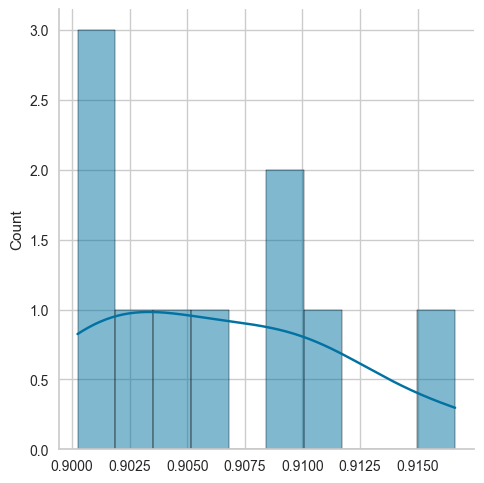

In [47]:
plt.figure(figsize=(10, 10))
sns.displot(results, kde= True, bins = 10)

## Make Submission

In [62]:
sample_submission = pd.read_csv("Data/sample_submission.csv")
sample_submission

,id,NObeyesdad
0,20758,Normal_Weight
1,20759,Normal_Weight
2,20760,Normal_Weight
3,20761,Normal_Weight
4,20762,Normal_Weight
...,...,...
13835,34593,Normal_Weight
13836,34594,Normal_Weight
13837,34595,Normal_Weight
13838,34596,Normal_Weight


In [63]:
test_ids

0        20758
1        20759
2        20760
3        20761
4        20762
         ...  
13835    34593
13836    34594
13837    34595
13838    34596
13839    34597
Name: id, Length: 13840, dtype: int64

In [64]:
y_pred = baseline.predict(test_final)

In [65]:
y_pred = y_pred.flatten()

In [66]:
submission = pd.concat([test_ids, pd.Series(y_pred, name= "NObeyesdad")], axis = 1)
submission

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
...,...,...
13835,34593,Overweight_Level_II
13836,34594,Normal_Weight
13837,34595,Insufficient_Weight
13838,34596,Normal_Weight


In [68]:
sample_submission.shape

(13840, 2)

In [69]:
submission.shape

(13840, 2)

In [70]:
submission.to_csv("./Submission.csv", header= True, index= False)